In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plp
from scipy import stats
import seaborn as sns
import numpy as np

import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

In [2]:
username = 'root'
password = '2808'
host = '127.0.0.1'          
port = '3306'                
database = 'vendor_db'

# Create engine
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')


df = pd.read_sql_table('sales_summary', con=engine)

print(df.head())

   VendorNumber                     VendorName  Brand  \
0             2  IRA GOLDMAN AND WILLIAMS, LLP  90085   
1             2  IRA GOLDMAN AND WILLIAMS, LLP  90609   
2            54    AAPER ALCOHOL & CHEMICAL CO    990   
3            60        ADAMBA IMPORTS INTL INC    771   
4            60        ADAMBA IMPORTS INTL INC   3401   

                    Description  PurchasePrice  actual_price  volume  \
0  Ch Lilian 09 Ladouys St Este          23.86         36.99     750   
1  Flavor Essence Variety 5 Pak          17.00         24.99     163   
2       Ethyl Alcohol 200 Proof         105.07        134.49    3750   
3   Bak's Krupnik Honey Liqueur          11.44         14.99     750   
4                  Vesica Vodka          11.10         14.99    1750   

   total_purchase_quantity  total_purchase_dollar  total_sale_dollar  \
0                      8.0                 190.88             665.82   
1                    320.0                5440.00             599.76   
2       

In [3]:
df.head(5)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actual_price,volume,total_purchase_quantity,total_purchase_dollar,total_sale_dollar,total_sales_price,total_sales_quantity,total_ExciseTax,total_freight,gross_profit,profit_margin,stock_turnover,sales_purchase_ratio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750,8.0,190.88,665.82,295.92,18.0,2.00,27.08,475,71.340603,2.250000,3
1,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,Flavor Essence Variety 5 Pak,17.00,24.99,163,320.0,5440.00,599.76,449.82,24.0,0.52,27.08,-4840,-806.989462,0.075000,0
2,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750,1.0,105.07,0.00,0.00,0.0,0.00,0.48,-105,0.000000,0.000000,0
3,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750,39.0,446.16,704.53,494.67,47.0,37.01,367.52,258,36.620158,1.205128,2
4,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750,6.0,66.60,0.00,0.00,0.0,0.00,367.52,-67,0.000000,0.000000,0


In [4]:
# summary statistic
df.describe().T     # (transpose)

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
actual_price,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,847.360643,664.309116,50.000000,750.000000,750.000000,750.000000,2.000000e+04
total_purchase_quantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
total_purchase_dollar,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
total_sale_dollar,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
total_sales_price,10692.0,18793.783627,44952.773386,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05
total_sales_quantity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05


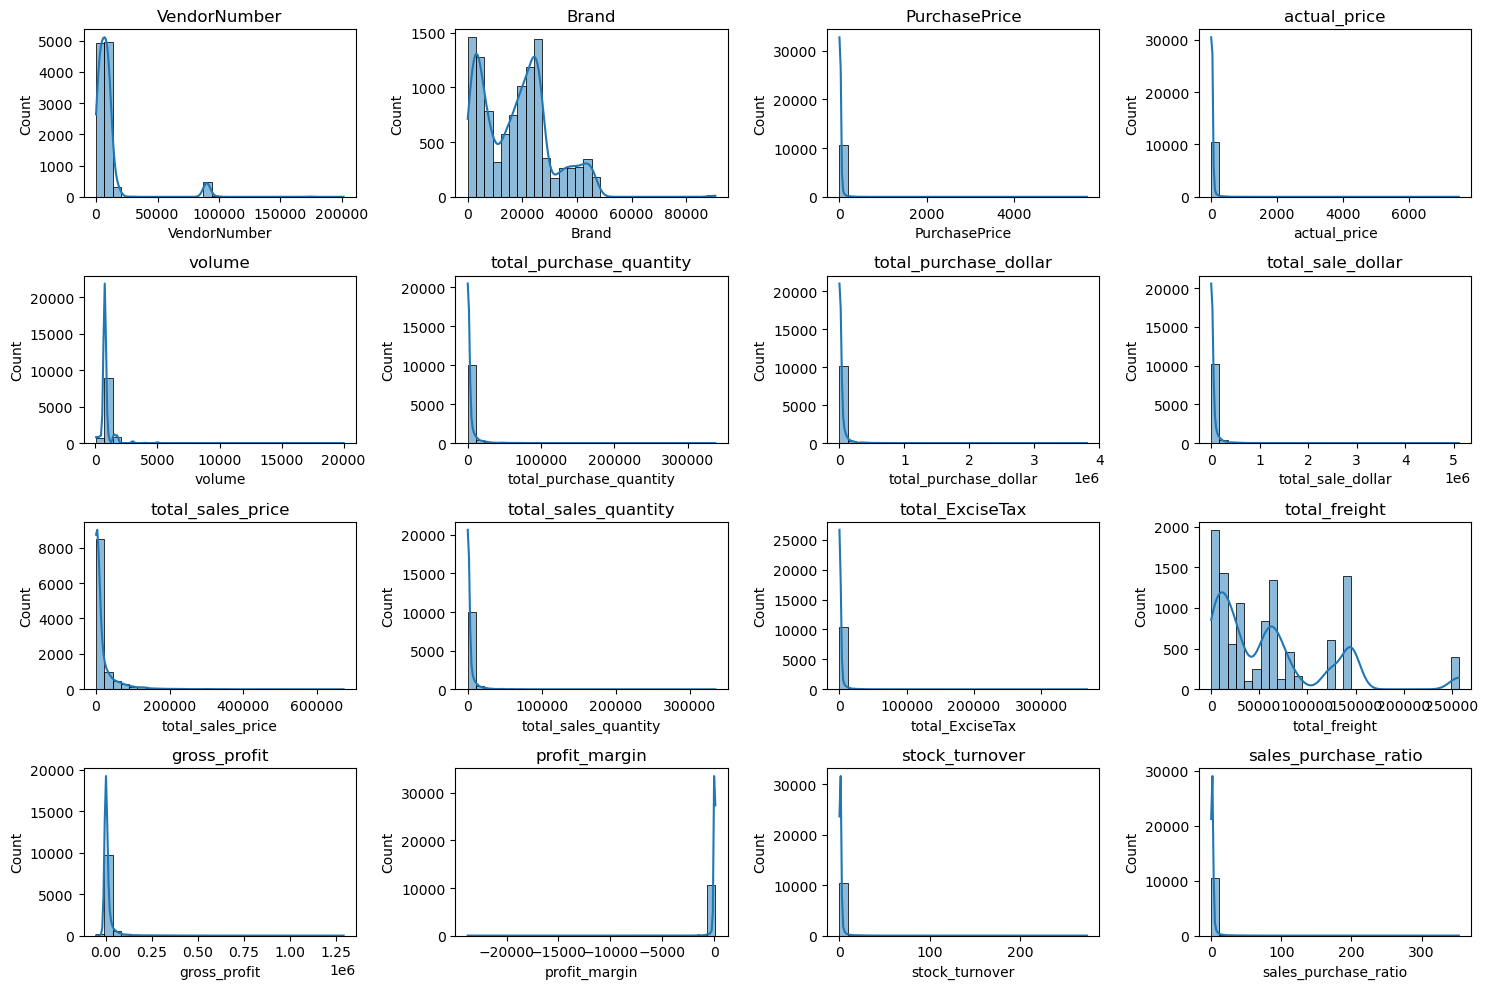

In [5]:
#select the numeric data columns for plotting of histogram
numeric_columns = df.select_dtypes(include = np.number).columns
plp.figure(figsize=( 15,10))
for i,col in enumerate(numeric_columns):
    plp.subplot(4,4,i+1)  #subploting for every column
    sns.histplot(df[col],kde = True,bins = 30)
    plp.title(col)
plp.tight_layout()
plp.show()

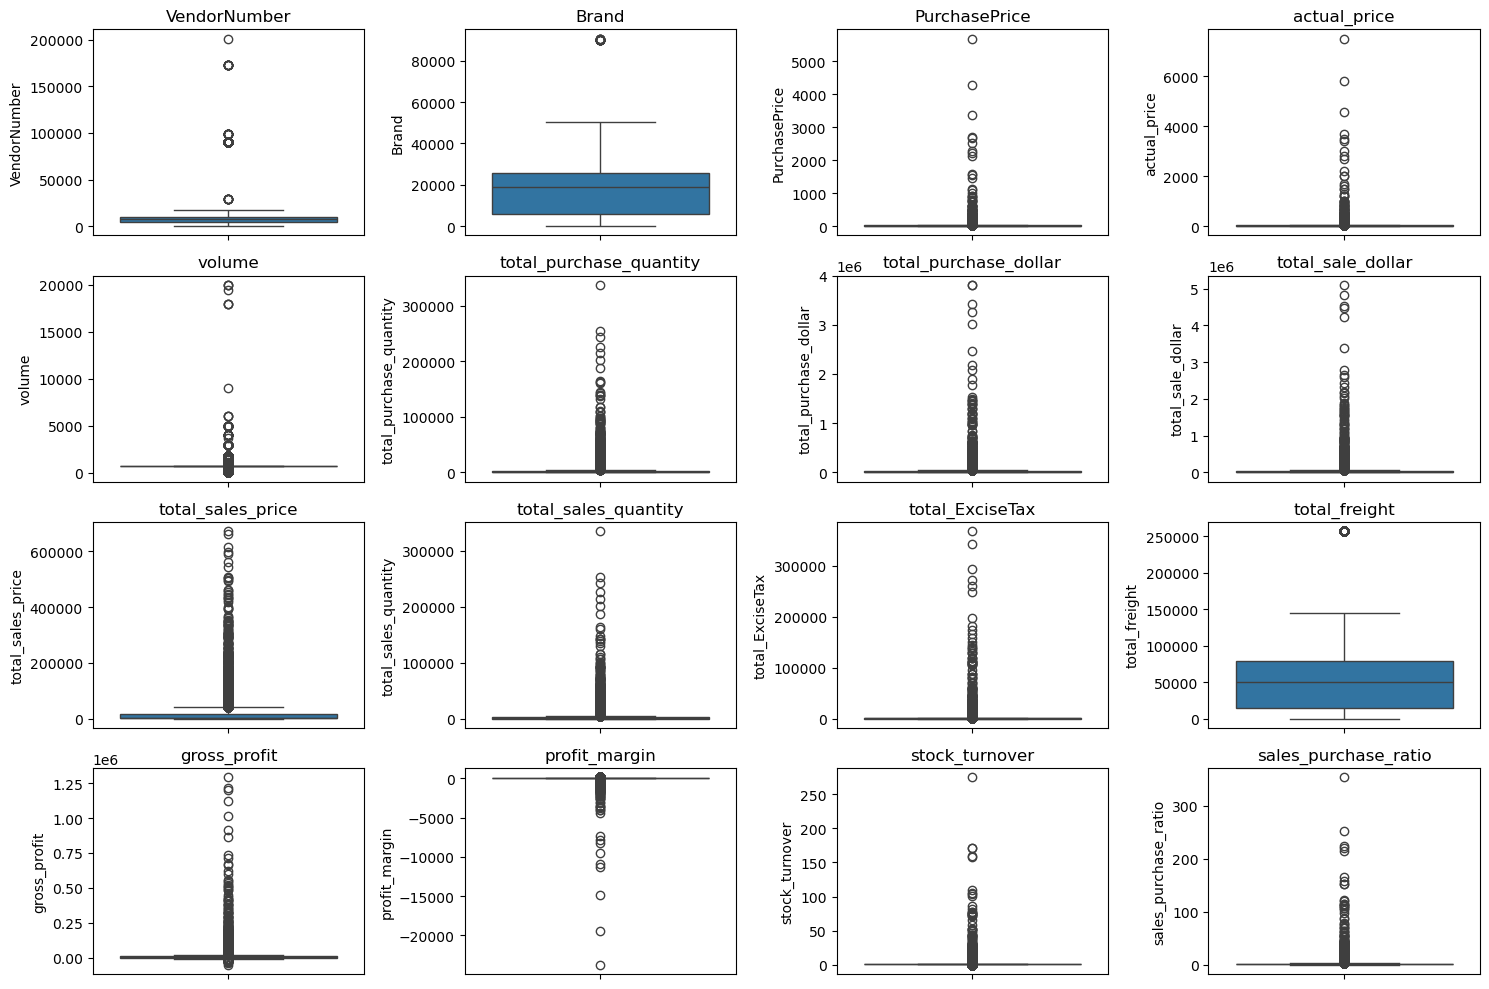

In [6]:
#outlier detection with boxplot
plp.figure(figsize=(15,10))
for i,col in enumerate(numeric_columns):
    plp.subplot(4,4,i+1)
    sns.boxplot(y= df[col])
    plp.title(col)
plp.tight_layout()
plp.show()

**Stats Insights**
* Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

* Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

* Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

* Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

* Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

* Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.

In [7]:
#filtering the data to remove inconsistencies
df2 = pd.read_sql_query('''select * from sales_summary
where gross_profit > 0 and profit_margin > 0
and total_sales_quantity > 0''',engine)

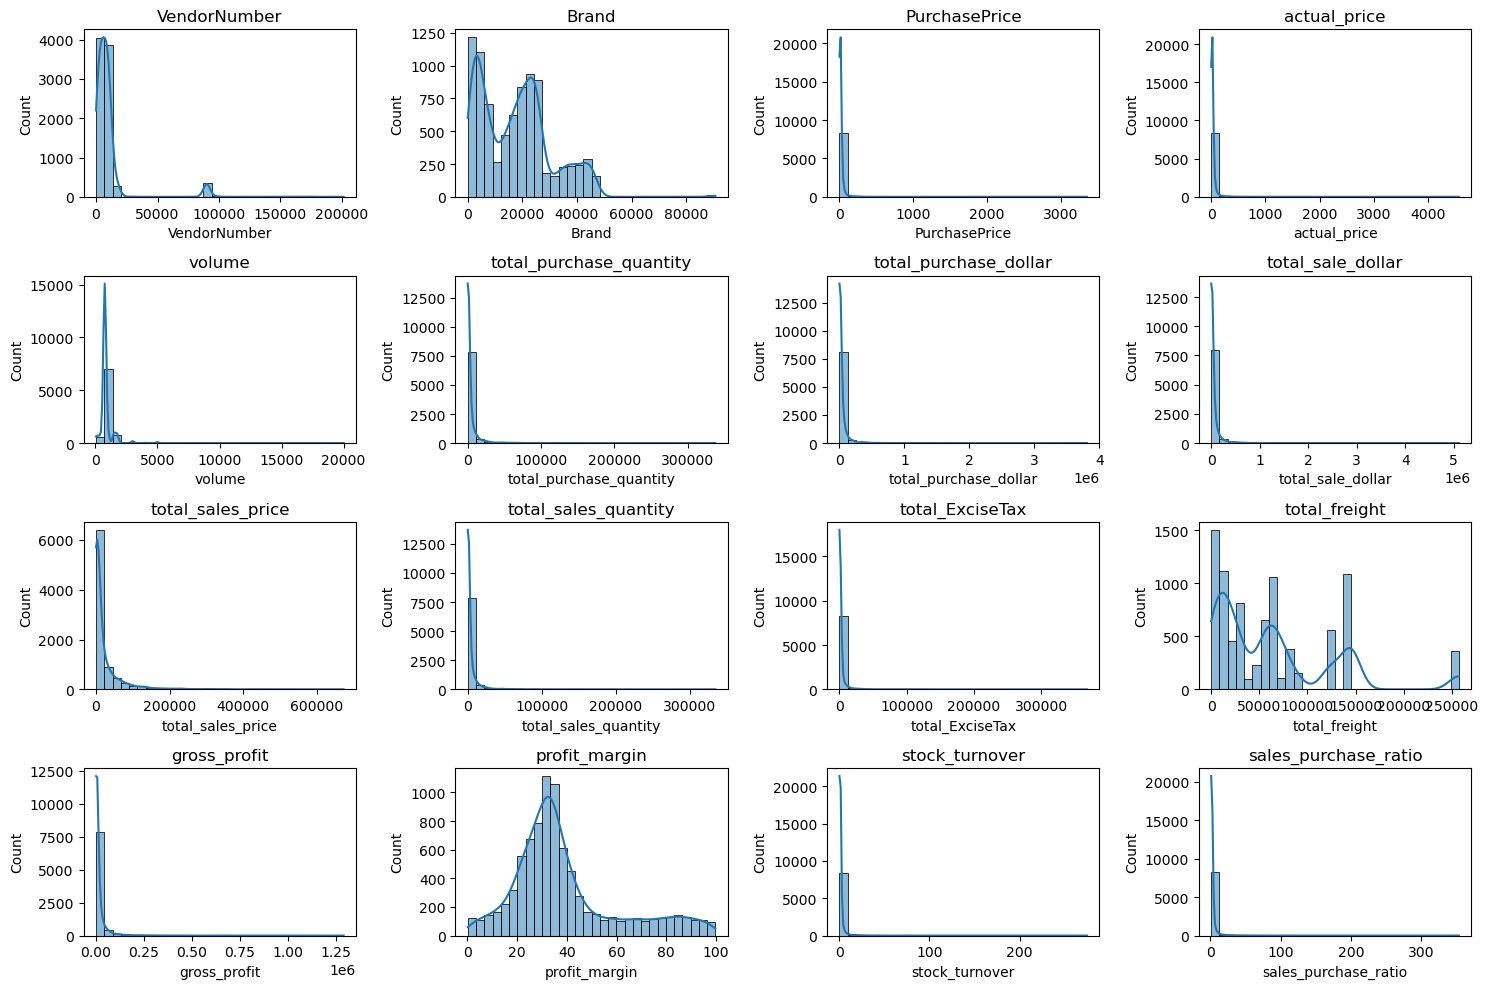

In [8]:
#distribution plot for numerical columns
numeric_columns2 = df2.select_dtypes(include = np.number).columns
plp.figure(figsize=( 15,10))
for i,col in enumerate(numeric_columns2):
    plp.subplot(4,4,i+1)  #subploting for every column
    sns.histplot(df2[col],kde = True,bins = 30)
    plp.title(col)
plp.tight_layout()
plp.show()

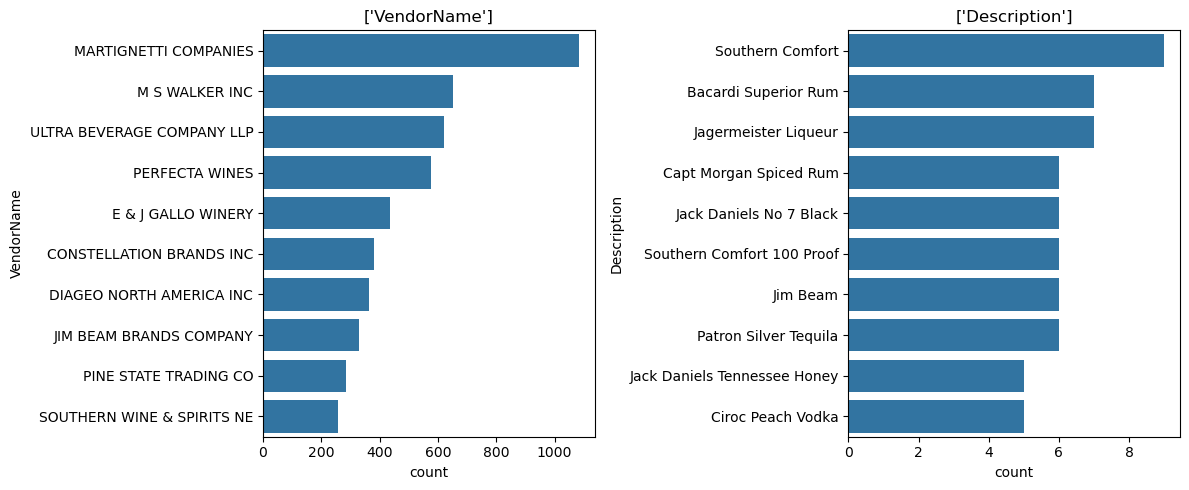

In [9]:
#count plot for categorical column
categorical_columns = ['VendorName','Description']
plp.figure(figsize=(12,5))
for i,col in enumerate(categorical_columns):
    plp.subplot(1,2,i+1)
    sns.countplot(y = df2[col],order= df2[col].value_counts().index[:10]) #top 10 category
    plp.title([col])
plp.tight_layout()
plp.show()

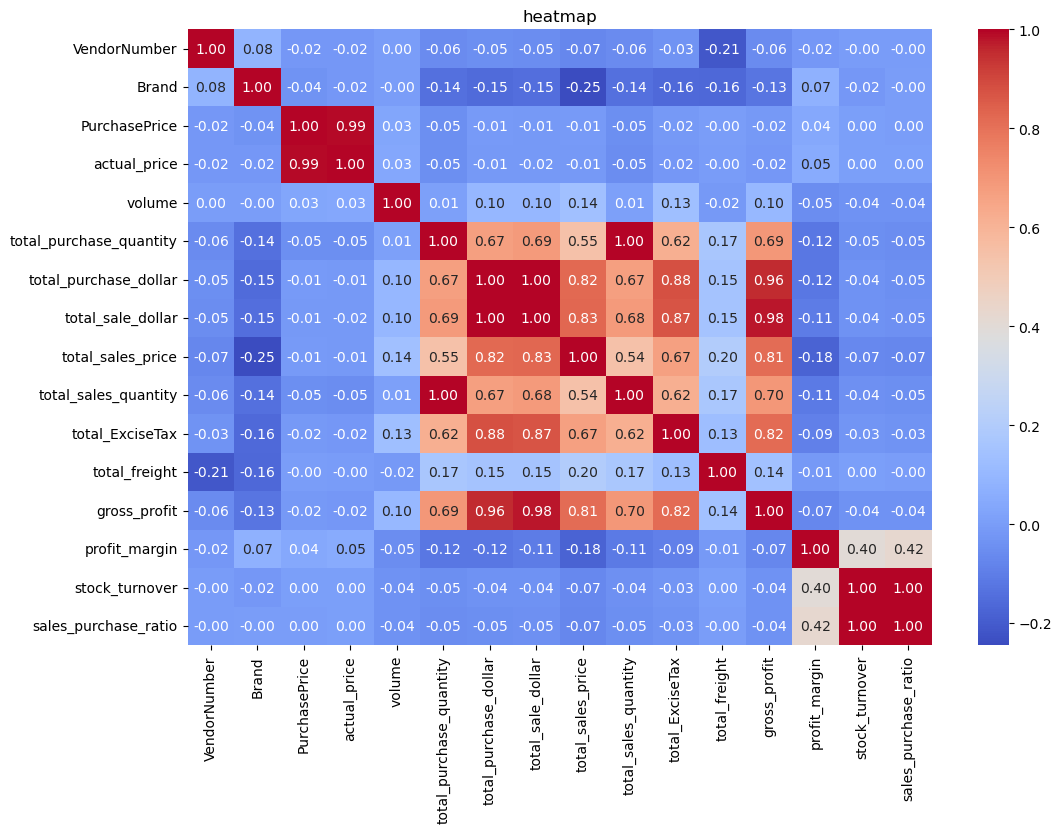

In [10]:
#correlation heatmap
correalation_column = df2[numeric_columns2].corr()
plp.figure(figsize=(12,8))
sns.heatmap(correalation_column, annot= True,fmt= '.2f', cmap= 'coolwarm')
plp.title('heatmap')
plp.show()

* Purchase price has weak correlation with total sales dollar (-0.01) and gross profit (-0.016) suggesting that price varioations does not significantly impact sale revenue.
* Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

* StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

**Identifiy brand that need promotional or price adjustment which exhibits lower sales performance and higher profit margin**

In [11]:
brand_data = df2.groupby('Description').agg({'total_sale_dollar' : 'sum','profit_margin' : 'mean'}).reset_index()

In [12]:
low_sale_threshhold = brand_data['total_sale_dollar'].quantile(0.15)
high_margin_threshhold = brand_data['profit_margin'].quantile(0.85)

In [13]:
low_sale_threshhold.round(2)

np.float64(562.02)

In [14]:
high_margin_threshhold.round(2)

np.float64(64.98)

In [15]:
#display brands with low sale and high profit margins
targeted_brands = brand_data[
    (brand_data['total_sale_dollar']<= low_sale_threshhold) &
              (brand_data['profit_margin']>= high_margin_threshhold)]

In [16]:
targeted_brands.sort_values('profit_margin', ascending = False)

,Description,total_sale_dollar,profit_margin
6953,The Club Strawbry Margarita,143.28,99.106644
1873,Chi Chi's Chocolate Malt RTD,461.58,98.141167
452,Bacardi Oakheart Spiced Trav,399.60,98.098098
5973,Riunite Sweet White,161.73,97.693687
4589,Mad Dogs & Englishmen Jumil,279.80,97.569693
...,...,...,...
2472,Dom Piquemal Cotes du Roussi,359.76,65.599288
7443,Viu Manent Cab Svgn La Capil,167.88,65.522993
6155,Samos High Peaks Muscat,160.86,65.274151
4761,McCormick Cherry Vodka,188.73,65.172469


In [17]:
brand_data = brand_data[brand_data['total_sale_dollar']< 10000] #for better visualization

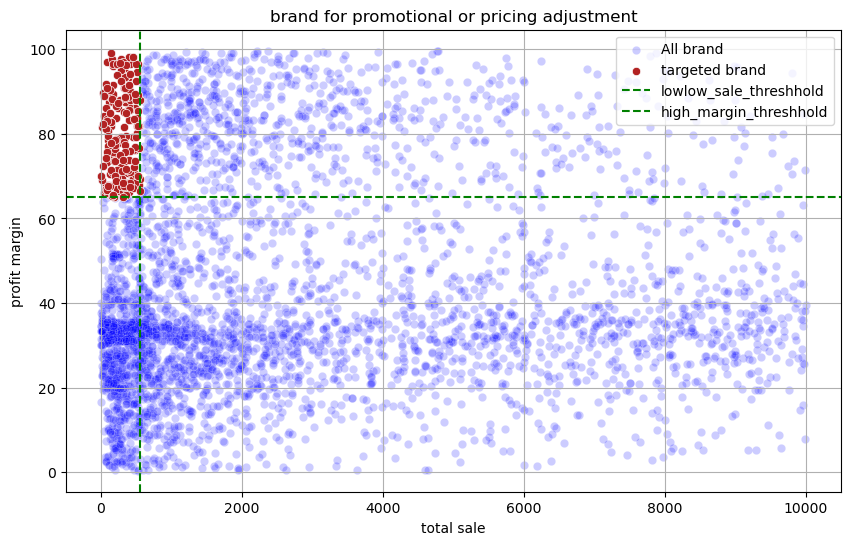

In [18]:
plp.figure(figsize=(10,6))
#ploting all brand
sns.scatterplot(data = brand_data, x = 'total_sale_dollar', y = 'profit_margin',color = 'blue',label = 'All brand', alpha = 0.2)
#ploting targeted brand
sns.scatterplot(data = targeted_brands, x = 'total_sale_dollar',y= 'profit_margin',color = 'firebrick', label = 'targeted brand')
# adding refrence threshold lines for low sales and high profit
plp.axvline(low_sale_threshhold, linestyle = '--', color = 'green', label = 'lowlow_sale_threshhold')
plp.axhline(high_margin_threshhold, linestyle = '--', color = 'green', label = 'high_margin_threshhold')

plp.xlabel('total sale')
plp.ylabel('profit margin')
plp.title('brand for promotional or pricing adjustment')
plp.legend()
plp.grid(True)
plp.show()

**Which vendor and brand demonstrate the highest sales performance ?**

In [19]:
top_vendor = df2.groupby('VendorName')['total_sale_dollar'].sum().sort_values(ascending = False).head(10)
top_brand = df2.groupby('Description')['total_sale_dollar'].sum().sort_values(ascending = False).head(10)

In [20]:
print(top_vendor)
print() 
print(top_brand)

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330215.60
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399323.82
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706338.59
Name: total_sale_dollar, dtype: float64

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: total_sale_dollar, dtype: float64


In [21]:
#Defining a function to convers large figures into abbriviated form for quicker understanding
def format_value(value):
    if value >= 1000000:
        return f'{value/1000000:.2f}M'
    elif value >= 1000:
        return f'{value/1000:2f}K'
    else:
        return str(value)

In [22]:
#top 10 vendor by sales performance
top_vendor.apply(format_value)

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: total_sale_dollar, dtype: object

In [23]:
#top 10 brand by sales performance
top_brand.apply(format_value)

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: total_sale_dollar, dtype: object

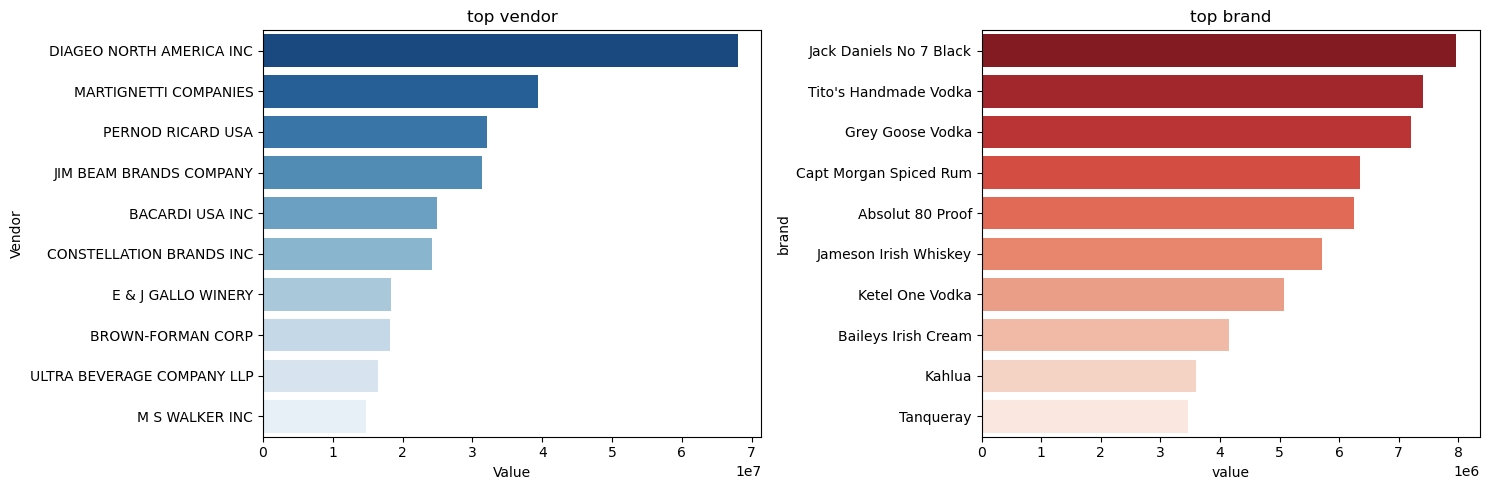

In [24]:
plp.figure(figsize=(15,5))

#bar plot for top 10 vendor
plp.subplot(1,2,1)
top_vendor_df = top_vendor.reset_index()
top_vendor_df.columns = ['Vendor', 'Value']
sns.barplot(y='Vendor', x='Value', data=top_vendor_df, palette= 'Blues_r')
plp.title('top vendor')

plp.subplot(1,2,2)
top_brand_df = top_brand.reset_index()
top_brand_df.columns = ['brand','value']

#bar plot for top 10 brand
sns.barplot(y = 'brand', x = 'value', data = top_brand_df, palette='Reds_r')
plp.title('top brand')
plp.tight_layout()
plp.show()

**Which vendor contributed the most to purchase ?**

In [25]:
vendor_performance = df2.groupby('VendorName').agg({'total_purchase_dollar':'sum','total_sale_dollar':'sum','gross_profit':'sum'}).reset_index()

In [26]:
vendor_performance

,VendorName,total_purchase_dollar,total_sale_dollar,gross_profit
0,ADAMBA IMPORTS INTL INC,446.16,704.53,258
1,ALISA CARR BEVERAGES,25698.12,104470.94,78775
2,ALTAMAR BRANDS LLC,11706.20,15706.81,4001
3,AMERICAN SPIRITS EXCHANGE,934.08,1511.16,577
4,AMERICAN VINTAGE BEVERAGE,104435.68,139603.53,35168
...,...,...,...,...
114,WEIN BAUER INC,42694.64,56217.13,13523
115,WESTERN SPIRITS BEVERAGE CO,298416.86,405254.83,106840
116,WILLIAM GRANT & SONS INC,5876538.26,7569876.20,1693337
117,WINE GROUP INC,5203801.17,8304043.28,3100237


In [27]:
# dividing the each purchase order of a vendor to the total sum of the column to get there contribution percentage
vendor_performance['purchase_contribution'] = vendor_performance['total_purchase_dollar']/vendor_performance['total_purchase_dollar'].sum()*100

In [28]:
round(vendor_performance.sort_values('purchase_contribution',ascending = False),2).head(10)

,VendorName,total_purchase_dollar,total_sale_dollar,gross_profit,purchase_contribution
25,DIAGEO NORTH AMERICA INC,50097226.16,67990099.42,17892873,16.30
57,MARTIGNETTI COMPANIES,25501952.19,39330215.60,13828255,8.30
68,PERNOD RICARD USA,23851164.17,32063196.19,8212034,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,31423020.46,7928715,7.64
6,BACARDI USA INC,17432020.26,24854817.14,7422794,5.67
20,CONSTELLATION BRANDS INC,15273708.08,24218745.65,8945035,4.97
11,BROWN-FORMAN CORP,13238939.18,18247230.65,5008289,4.31
30,E & J GALLO WINERY,12067963.70,18399323.82,6331358,3.93
106,ULTRA BEVERAGE COMPANY LLP,11167081.61,16502544.31,5335462,3.63
53,M S WALKER INC,9764192.72,14706338.59,4942136,3.18


In [29]:
top_vendor_contribution = round(vendor_performance.sort_values('purchase_contribution',ascending = False),2).head(10)

#using format value function for better understanding
top_vendor_contribution['total_purchase_dollar'] = top_vendor_contribution['total_purchase_dollar'].apply(format_value)
top_vendor_contribution['total_sale_dollar'] = top_vendor_contribution['total_sale_dollar'].apply(format_value)
top_vendor_contribution['gross_profit'] = top_vendor_contribution['gross_profit'].apply(format_value)
top_vendor_contribution

,VendorName,total_purchase_dollar,total_sale_dollar,gross_profit,purchase_contribution
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18


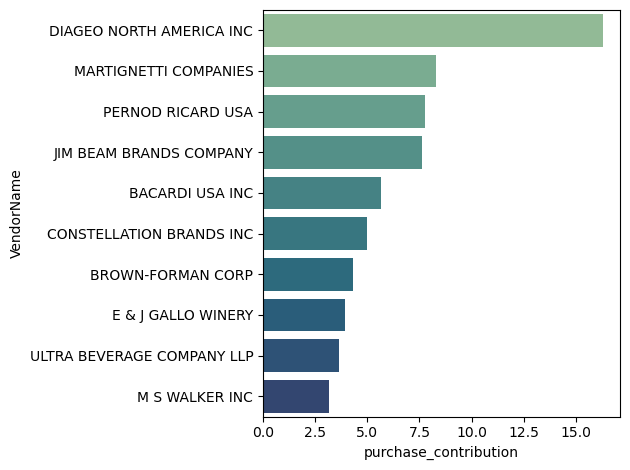

In [30]:
#Display top 10 vendors
sns.barplot(y = top_vendor_contribution['VendorName'], x = top_vendor_contribution['purchase_contribution'],
            palette= 'crest', data = top_vendor_contribution)
plp.tight_layout()

In [31]:
#contribution made by the top 10 vendors
print(f'total purchase contribution of top 10 vendors: {float(round(top_vendor_contribution['purchase_contribution'].sum(),2))}%')

total purchase contribution of top 10 vendors: 65.69%


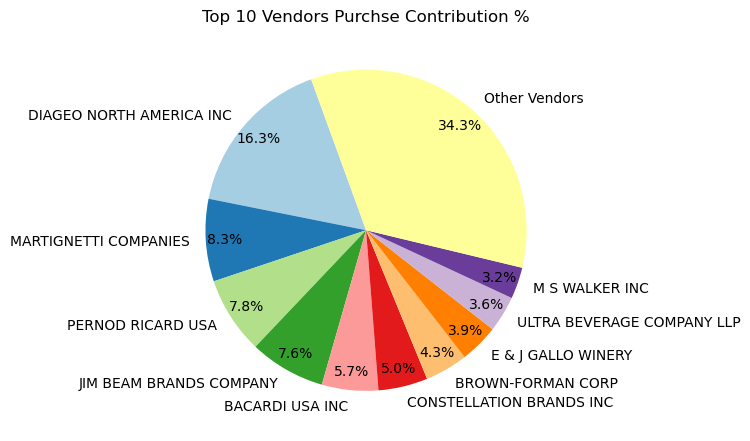

In [32]:
top_10_vendors_df = vendor_performance.sort_values('purchase_contribution', ascending=False).head(10)
other_total = vendor_performance['purchase_contribution'].sum() - top_10_vendors_df['purchase_contribution'].sum()

vendors = list(top_10_vendors_df['VendorName'].values)+ ['Other Vendors']
purchase_contribution = list(top_10_vendors_df['purchase_contribution'].values)+ [other_total]

#Pie chart
plp.pie(purchase_contribution,labels=vendors,autopct= '%1.1f%%',startangle= 110,pctdistance= 0.88, colors = plp.cm.Paired.colors)
plp.tight_layout()
plp.title('Top 10 Vendors Purchse Contribution %')
plp.show()

**Does purchasing in bulk reduces the unit cost and what is the most optimal purchase volume for cost saving ?**

In [33]:
df2['Unit_purchase_price'] = df2['total_purchase_dollar']/df2['total_purchase_quantity']

In [34]:
#dividing the unit price into three groups low, medium and high
df2['order_size'] = pd.qcut(df2['total_purchase_quantity'], q = 3, labels = ['small','medium','large'])

In [35]:
df2.groupby('order_size')[['Unit_purchase_price']].mean()

,Unit_purchase_price
order_size,
small,39.103879
medium,15.480793
large,10.778675


* Vendors buying stock in bulk gets a significantly lower unit price meaning higher margins, if inventory is manged efficiently
* The price difference between the large and small order is significant (72% reduction in cost)

Which vendor have low inventory turnover, indicating excess stock and slow moving goods ?

In [36]:
df2[df2['stock_turnover'] < 1].groupby('VendorName')[['stock_turnover']].mean().sort_values('stock_turnover', ascending = True).head(10)

,stock_turnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


**How much capital is in the unsold inventory per vendor and which vendor contribute the most to it ?**


In [37]:
df2['unsold_inventory_value'] = (df2['total_purchase_quantity'] - df2['total_sales_quantity'])*df2['PurchasePrice']
print('Total capital in unsold inventory: ', format_value(df2['unsold_inventory_value'].sum()))

Total capital in unsold inventory:  2.71M


In [38]:
#Aggregate unsold capital per vendor
inventory_value_per_vendor = df2.groupby('VendorName')['unsold_inventory_value'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values('unsold_inventory_value', ascending = False).head(10)
inventory_value_per_vendor['unsold_inventory_value'] = round(inventory_value_per_vendor['unsold_inventory_value'],2)
inventory_value_per_vendor

,VendorName,unsold_inventory_value
25,DIAGEO NORTH AMERICA INC,722209.05
46,JIM BEAM BRANDS COMPANY,554665.63
68,PERNOD RICARD USA,470625.61
116,WILLIAM GRANT & SONS INC,401960.83
30,E & J GALLO WINERY,228138.73
79,SAZERAC CO INC,198436.41
11,BROWN-FORMAN CORP,177733.74
20,CONSTELLATION BRANDS INC,133617.62
61,MOET HENNESSY USA INC,126477.70
77,REMY COINTREAU USA INC,118598.15


**Is there significant differnce in profit margins between the top performing and low performing vendors?**

Hypothesis :-

H0 (Null hypothesis) - There is no significant difference in the mean profit margin of the top performing vendor and the low performing vendor

H1 (Alternate hypothesis) - the mean profit margin of top performing and low performing vendor are significantly different

In [39]:
top_threshhold = df2['total_sale_dollar'].quantile(0.75)
low_thereshhold = df2['total_sale_dollar'].quantile(0.25)

top_selling_vendors = df[df['total_sale_dollar'] >= top_threshhold]['profit_margin'].dropna()
low_selling_vendors = df[df['total_sale_dollar']<= low_thereshhold]['profit_margin'].dropna()

t_stat, p_value = ttest_ind(top_selling_vendors,low_selling_vendors,equal_var=False)

if p_value < 0.05:
    print('Rejct H0: there is a significant difference in profit margin between the top performing and low performing vendor')
else:
    print('Fail to reject H0: No significant difference in profit margin ')

Rejct H0: there is a significant difference in profit margin between the top performing and low performing vendor
